<h2 dir="rtl">
ندا تقی زاده سراجه
    <br>
    98170743
    <br>
    موضوع: متون شعرای مختلف 
</h2>

<h3 dir="rtl">
    
در این تمرین قصد داریم داده با کمک کتابخانه های beautifulSoup , request  استفاده نماییم و داده هایمان را از سایت مد نظر (گنجور) کراول کنیم.  
همچنین توضیحات نحوه ی استفاده از این کتابخانه و دستورات بیشتر آن در لینک روبه رو قابل مشاهده است.
    [check this Web Site](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
    
</h3>

In [242]:
!pip install bs4
!pip install dadmatools
!pip install hazm

  Using cached nltk-3.3-py3-none-any.whl
  Attempting uninstall: nltk
    Found existing installation: nltk 3.6.7
    Uninstalling nltk-3.6.7:
      Successfully uninstalled nltk-3.6.7


In [2]:
import  requests
from bs4 import BeautifulSoup

<h4 dir="rtl">
دراین تمرین   قصد کراول کردن دیتا از سایت گنجور را داریم که در ابتدا آدرس سایت مربوطه را درون متغیری ریخته و همچنین  آرایه ای پیرامون نگه داری تمامی لینک های صفحه ی اول سایت نگه میداریم.
    با توجه به ساختار سایت گنجور اگر در ابتدا وارد سایت شوید متوجه میشوید که برای هر شاعر لینک ورود به صفحه ی جدید است که با زدن بر روی آن لینک میتوانید وارد صفحه ی جدیدی شوید و اشعار یا کتب مربوط به آن شاعر را طبق دسته بندی خاص مربوطه مشاهده نمایید.
</h4>

<h4 dir="rtl">
در سلول زیر ما یک متغیر بیس یوآر ال میسازیم و میخواهیم دامنه اصلی سایت را در آن نگه داریم چون در آدرس سایت مان در ابتدا بیس یوآر ال می آید و پس از آن باقی آدرس  مربوطه.
    تمامی لینک هایی که میخواهیم کراول کنیم هم در آرایه ساخته شده ذخیره میکنیم.
</h4>

In [3]:
base_url = "https://ganjoor.net"

all_links_list=[]

<h4 dir="rtl">
همچنین قصد داریم که از سه دسته ی گوناگون شاعر انتخاب کنیم  و لیست های مربوطه را برای ذخیره سازی لینک های سه دسته ی                 شاعران مرد قدیمی و شاعران زن قدیمی و شاعران امروزی طبقه بندی مینماییم و همچنین لیست دیگری طراحی میکنیم که نام تمامی این افراد را نگه داری کند.
</h4>

In [4]:
women_poets_list=[]
men_poets_list=[]
contemporary_poets_list=[]

all_names_list=[]

<h4 dir="rtl">
در تابع زیر به سایت مد نظر درخواست فرستاده و تمامی لینک های موجود که با تگ  a  آغاز میشوند را باز میگرداند و درون لیست مربوطه مان نگه داری میکنیم.
    در واقع اگر وارد سایت گنجور شویم و دکمه اینسپکت را بزنیمف متوجه میشویم که نام کلاسی که درون تگ های html دارند caption. است پس با داشتن این اطلاعات میتوانیم تابع زیر را بنویسیم.
    در واقع هنگامی که نام کلاس مربوطه به تابع میدهیم میاید و اطلاعات را کراول کرده و لینک حاصل شده را به بیس یوآر ال مان میچسباند و لینک های نهایی را درون آرایه مان میریزد.
    
</h4>

In [5]:
def send_request( address , class_name , list_name , base_url ):
    request_first_page= requests.get(address)
    soup_first_page = BeautifulSoup(request_first_page.text, "html.parser")
    poets_first_page = soup_first_page.select(class_name)
    for i in poets_first_page:
        list_name.append(base_url + str(i.a['href']))


<br>
<br>

<hr >
<hr>

<h4 dir="rtl">
همچنین میتوانیم کد دیگری برای کراول کردن سایت گنجور با استفاده از کتابخانه ی دیگر به نام scrapy نوشت که من هر دو گونه و هر دو روش کراول کردن در پایتون  را در این تمرین شرح دادم.
    <br>
    دقت شود که تابعی که در سلول بالا است، با کمک کتاب خانه BeautifulSoup 
   است
    <br>
    و کدی که در زیر نوشتم هم همان کار کراول کردن را میکند منتها با کتابخانه ی scrapy 
    است 
<br>
    <br>
    
    دقت شود  که هر دو نو کدی که با دو نوع کتابخانه ی متفاوت درج شده، کار میکنند و ولید هستند اما صرفا چون بیوتیفول سوپ راحتتر و خوانا تر است ادامه کار اصلی را با آن در پیش میگیریم 

</h4>

In [219]:
!pip install scrapy

In [220]:
import scrapy
import os
from scrapy.crawler import CrawlerProcess

<h4 dir="rtl">
با اجرای سلول زیر سه پوشه به‌ نام سعدی و فردوسی و خیام ساخته می‌شود و در هرکدام یک فایل txt تولید می‌شود که تمام شعر 
        شاعر مربوطه را در خود دارد
<br>
    حجم کد و دشواری بین این دو کتابخانه را میتوانید مقایسه کنید...  :) ادامه ی کار را با کتابخانه ی بیوتیفول سوپ در پیش میگیریم.
</h4>

In [221]:
class PoetsSpider(scrapy.Spider):
    name = 'poets'
    start_urls = ['https://ganjoor.net/']

    def parse(self, response, **kwargs):
        poets = []
        for poet in [response.css('div.poet')[1]] + response.css('div.poet')[3:5]:
            name = poet.css('.caption a::text')[0].get()
            next_page = poet.css('.caption a::attr(href)').get()
            if next_page is not None:
                poets.append((name, next_page))

        for poet in poets:
            next_page = response.urljoin(poet[1])
            os.mkdir(os.path.join(os.getcwd(), poet[0]))
            yield scrapy.Request(next_page, callback=self.parse_poet)

    def parse_poet(self, response):
        books = []
        for book in response.css('div.part-title-block'):
            name = book.css('a::text')[0].get()
            next_page = book.css('a::attr(href)').get()
            if next_page is not None:
                books.append((name, next_page))

        for book in books:
            next_page = response.urljoin(book[1])
            yield scrapy.Request(next_page, callback=self.parse_poem)

    def parse_poem(self, response):
        parts = []
        for part in response.css('div.part-title-block'):
            name = part.css('a::text')[0].get()
            next_page = part.css('a::attr(href)').get()
            if next_page is not None:
                parts.append((name, next_page))

        for part in parts:
            next_page = response.urljoin(part[1])
            yield scrapy.Request(next_page, callback=self.parse_poem_excerpt)

    def parse_poem_excerpt(self, response):
        poem_excerpt = []
        for part in response.css('p.poem-excerpt'):
            name = part.css('a::text')[0].get()
            next_page = part.css('a::attr(href)').get()
            if next_page is not None:
                poem_excerpt.append((name, next_page))
        for part in poem_excerpt:
            next_page = response.urljoin(part[1])
            yield scrapy.Request(next_page, callback=self.parse_poem_finally)

    def parse_poem_finally(self, response):
        poet = response.css('div.width-100per a::text').get()
        file = f'{os.getcwd()}/{poet}/poem.txt'
        with open(file, 'a') as f:
            for part in response.css('div.b'):
                m1 = part.css('.m1 p::text')[0].get()
                m2 = part.css('.m2 p::text')[0].get()
                f.write(f'{m2}            {m1}\n')
            f.close()

<hr >
<hr >

<h4 dir="rtl">
با توجه به ساختار سایت گنجور، تمامی لینک های درون صفحه ی اول سایت جمع آوری شده و حالا باید دنبال لینکهای مد نظرمان بر اساس شاعرانی که میخواهیم باشند، پس به تابع زیر اسم شاعران مربوطه را میدهیم که لینک آدرس هر صفحه ی شاعر را درون لیست های از پیش تعریف شده مان ذخیره سازد.
</h4>

In [6]:
def select_poets(links_list, name1, name2, name3, poestList):
    for i in links_list:
        if i.__contains__(name1) or i.__contains__(name2) or i.__contains__(name3):
            if i not in poestList: #Avoid adding duplicates
                poestList.append(i)


<h4 dir="rtl">
تابع زیر هم برای این است که هنگامی که داده هایمان را کراول کردیم درون فایل بنویسیم و منطق بدین صورت است که فایل را باز کرده و خط به خط آرایه ای که به ان میدهیم را درون فایل مان مینویسد.
</h4>

In [7]:
def write_in_file( filename , mesrae_list ):
    with open(filename , 'w' , encoding="UTF-8") as f:
        for i in mesrae_list:
            f.write("%s\n" % i)

<h4 dir="rtl">
در خط زیر تابع از پیش تعریف شده را صدا میزنیم و با توجه به کلاس مربوطه، داده ی مورد نظرمان را از این صفحه جمع آوری میکنیم.
</h4>

In [8]:
send_request("https://ganjoor.net"  ,  ".caption"  , all_links_list , base_url)


<h4 dir="rtl">
لینک های جمع آوری شده در لیست زیر قابل نمایش است اما چون تعداد شان 197 تا است ما ده مورد از آنها را نمایش میدهیم.
</h4>

In [254]:
print(len(all_links_list))
print(all_links_list[0:9])

197
['https://ganjoor.net/hafez', 'https://ganjoor.net/saadi', 'https://ganjoor.net/moulavi', 'https://ganjoor.net/ferdousi', 'https://ganjoor.net/khayyam', 'https://ganjoor.net/nezami', 'https://ganjoor.net/roodaki', 'https://ganjoor.net/abusaeed', 'https://ganjoor.net/daghighi']


<h4 dir="rtl">
در سلول زیر هم تابع از پیش تعریف شده ی مربوطه را فرا میخوانیم و شاعرانی که مدنظر داریم را میابیم و لینک هایشان را درون لیست های از پیش ساخته شده میریزیم.
</h4>

In [11]:
select_poets(all_links_list, "hafez", "ferdousi", "vahshi", men_poets_list)
select_poets(all_links_list, "mahsati" , "jahan", "afsar", women_poets_list)
select_poets(all_links_list, "iraj" ,"parvin", "shahriar", contemporary_poets_list)


<h4 dir="rtl">
حال برای تست که مطمعن باشیم کع شاعرانی که خواسته بودی را لینک شان را دریافت کردیم، یکی از لیست های حاوی لین را پرینت میگیریم.
    <br>
    مطابق آنچه که انتظار میرفت لینک های مربوط به شعرای ایرج و پروین و شهریار در لیست مان بودند.
</h4>

In [12]:
print(contemporary_poets_list)

['https://ganjoor.net/iraj', 'https://ganjoor.net/parvin', 'https://ganjoor.net/shahriar']


<h4 dir="rtl">
در سایت گنجور برای دیدن اشعار مربوطه باید از دو صفحه عبور کرد و برای برخی دیگر از شعرا با عبور کردن از یک صفحه میتوان به اشعار مربوطه دست یافت برای روشن تر کردن مطلب به دو مثال زیر دقت فرمایید:
    <br>
    برای مثال اگر به دنبال اشعار فردوسی میگردین، ابتدا باید وارد صفحه ی اولیه سایت گنجور شوید و پس از کلیک بر روی نام فردوسی به صفحه ای منتقل میشوید که باید از بین کتبش یکی را برگزینید حالا پس از انتخاب نام کتاب، به صفحه ی دیگری منتقل میشوید که نوع و دسته بندی شعر مربوطه تان را انتخاب کنید که این فرآیند در دو پارت یه به عبارتی دیگر در دو مرحله به خواسته مان میرسیم و انجام میشود.
    و همچنین اگر شما به دنبال اشعار حافط باشید و در صفحه ی اولیه و اصلی سایت گنجور روی اسم این شاعر کلیک کنید به صفحه ای میروید که اشعار وی را دسته بندی کرده (مثلا غزلیات، قطعات، رباعیات و....) سپس با انتخاب نوع شعر مورد نر برایتان اشعار مربوزه نشان داده میشود این مثالی از تک پارتی بود که در تابع بعدی کد آن درج شده است (به عبارتی در کد زیر ما مجبوریم یک صفحه را بیشتر بگردیم تا به داده ی مورد نظر دست یابیم.) 
    به طور خلاصه برای برخی از شاعران مانند فردوسی نیاز است تعداد صفحه بیشتری باز کنیم تا به ابیات وی برسیم اما برای برخی از شاعران دیگر با توجه به سبک و تعداد کتاب هایشان باز کردن یک لینک کافی است.
    <br>
     برای شاعرانی که نیاز است  دو صفحه لینک باز کنیم برایاشن تابعی به نام get_poems_in_two_part_pages نوشتیم.
    <br>
    و برای شاعرانی که نیاز است تنها یک صفحه باز کنیم تا به کراول کردن برسیم، تابع get_single_page_poems را نوشتیم. 
</h4>

In [13]:
def get_poems_in_two_part_pages(list_of_poet , index , name1 , name2  , all_names_list):
    hafez_link = str(list_of_poet[index])+"/"
    poet_href_list = []
    send_request( hafez_link ,  ".part-title-block" , poet_href_list , base_url)


    kind_of_poem_link= ""
    for i in poet_href_list:
        if i.__contains__(name1):
            kind_of_poem_link = i +"/"


    all_kinds_links_list = []
    send_request(kind_of_poem_link  , ".part-title-block" , all_kinds_links_list , base_url )


    part2=""
    
    for i in all_kinds_links_list:
        if i.__contains__(name2):
            part2 = i +"/"


    all_kinds_links_list2 = []
    send_request(part2  , ".poem-excerpt" , all_kinds_links_list2 , base_url )


    mesraee_list=[]

    for i in all_kinds_links_list2:
        request_mesraee = requests.get( str(i) )
        soup_mesraee_page = BeautifulSoup(request_mesraee.text, "html.parser")
        mesraee = [div.get_text()  for div in soup_mesraee_page.select('div[class^="m"]') ][0: -1]
        mesraee_list += mesraee

    file_name=  str(list_of_poet[index]).split("/")[3]+"_"+name2+".txt"
    all_names_list.append(  str(file_name))
    write_in_file( file_name , mesraee_list )



<h4 dir="rtl">
این تابع هم مشابه تابع قبلی است که مثالی هم برای این مورد ذکر شد.
</h4>

In [14]:
def get_single_page_poems(list_of_poet, name1, index , all_names_list):
    hafez_link = str(list_of_poet[index]) + "/"
    poet_href_list = []
    send_request( hafez_link ,  ".part-title-block" , poet_href_list , base_url)


    kindof_poet_link= ""
    for i in poet_href_list:
        if i.__contains__(name1):
            kindof_poet_link = i +"/"


    all_poet_links_list = []
    send_request(kindof_poet_link  , ".poem-excerpt" , all_poet_links_list , base_url )

    mesraee_list=[]

    for i in all_poet_links_list:
        request_mesraee = requests.get( str(i) )
        soup_mesraee_page = BeautifulSoup(request_mesraee.text, "html.parser")
        mesraee = [div.get_text()  for div in soup_mesraee_page.select('div[class^="m"]') ][0: -1]
        mesraee_list += mesraee

    file_name =  str(list_of_poet[index]).split("/")[3] + "_" + name1 + ".txt"
    all_names_list.append(  str(file_name) )
    write_in_file( file_name , mesraee_list )
    

<h4 dir="rtl">
حالا بر اساس دو پارتی یا تک پارتی بودن شاعران آنها را در توابع مربوط به خود صدا میزنیم
همچنین اگر به ساختار سایت آشنایی نداشته باشید و در نحوه ی صدا زدن شاعر شک داشته باشید با توجه به کتب شاعر و سبک های 
        شعری وی میتوان فهمید که وی را در چه تابعی گنجاند و کال کرد
<br>
    دقت داشته باشید که در برخی اوقات سایت گنجور کند عمل میکند و دیر بالا می آید و برای ران کردن سه سلول پیش رو (با توجه به حجم داده ها) باید شکیبا باشید و ترجیحا از وای فای  استفاده نمایید که اینتراپتی وسطش ایجاد نشود.
</h4>

In [17]:
get_single_page_poems(men_poets_list, "ghazal", 0 , all_names_list)
get_poems_in_two_part_pages(men_poets_list , 1 , "shahname" , "sohrab" , all_names_list )
get_poems_in_two_part_pages(men_poets_list , 2 , "divanv" , "ghazalv" , all_names_list )


In [18]:
get_single_page_poems(contemporary_poets_list , "ghaside", 0 , all_names_list)
get_poems_in_two_part_pages(contemporary_poets_list , 1 , "divanp" , "ghasidep" , all_names_list )
get_single_page_poems(contemporary_poets_list , "gozidegh", 2 , all_names_list)


In [19]:
get_single_page_poems(women_poets_list , "robmah", 0 , all_names_list )
get_poems_in_two_part_pages(women_poets_list ,1 , "divan" , "ghaside" , all_names_list)
get_single_page_poems(women_poets_list , "kooroshname", 2 , all_names_list )


<h4 dir="rtl">
حال با توجه به دیتاهای جمع آوری شده و کتاب خانه های مربوطه مصراع ها را خوانده و درون دیکشنری ای ذخیره میکنیم که کلیدش نام شاعر مربوطه (نام فایل ) است و ولیوهای آن مصراع ها است و همچنین سپس آنها را نرمال سازی کرده و برای مثال موارد اضافی از قبیل اعراب و ... را پاک سازی میکنیم.
    <br>
    طبق آنچه که استاد در کلاس NLP به ما آموزش دادن و با استفاده از نوت بوک هایشان، از کتابخانه هایی که آموزش دادن، استفاده میکنیم.
    <br>
    با کمک tqdm مراحل و میزان ران شدن و تکمیل کار را نشان میدهیم.
    <br>
      با کمک کتابخانه hazm و توابع normalizer به نرمال سازی متن میپردازیم.
    <br>
    کتابخانه codecs در پایتون برای کدگذاری و کدگشایی رشته‌های متنی در فرمت‌های مختلف استفاده می‌شود.
</h4>

In [20]:
import hazm
import tqdm
from hazm import *
import random
import codecs

mesra_collection_dict={}

normalizer = Normalizer()

mesra_normalized = {}


for i in all_names_list:
    mesra_collection_dict[i] = [x.strip().split() for x in
                                tqdm.tqdm(codecs.open( i , 'rU', 'utf-8').readlines())]

    mesra_normalized[i] = [[normalizer.normalize(y) for y in x] for x in tqdm.tqdm(mesra_collection_dict[i])]



100%|██████████| 30339/30339 [00:01<00:00, 28481.38it/s]


<h4 dir="rtl">
حال در ادامه قصد داریم فرکانس کل کلمات را بگیریم که کلا هر کلمه چند بار تکرار شده که در دیکشنری فرکانس ذخیره 
        میشوند(کلمات کلیدمان هستند و ولیو شان تعداد تکرارشان است.)
<br>
    بدین منظور تابعی همانند زیر به نام find_counts_of_each_word_for_all_poets  میزنویسیم در دیکشنری مان بیاد و جست و جو کند و اساس کار بدین صورت است که اگر آن کلمه موجود نبود، در صورت یافت شدن مقدارش را یک کند و اگر بیشتر پیدا شد  به تعداش یکی اضافه کند. 
</h4>

In [29]:
frekans={}

def find_counts_of_each_word_for_all_poets(frekans):
    for key , value in mesra_normalized.items():
        for mesrae in value:
            for i in mesrae:
                if i not in frekans.keys():
                    frekans[i]=1
                else:
                    frekans[i]= (frekans[i]+1)


<h4 dir="rtl">
حال تابع مربوطه را کال کرده و سپس دیکشنری فرکانس را نشان میدهیم.
    <br>
    باتوجه به ریزالت حاصل، میتوان فهمید که بیشترین تعداد تکرار برای اسپیس و حروف اضافه است.
</h4>

In [262]:
find_counts_of_each_word_for_all_poets(frekans)

for k , v in frekans.items():
    print(k , ":" , v ,"\n")

× : 5520 

ورود : 2764 

به : 76424 

گنجور : 35890 

پست : 2816 

الکترونیکی: : 2760 

گذرواژه: : 2760 

اگر : 3804 

پیش‌تر : 2760 

در : 31304 

گنجینه : 2784 

یا : 30706 

پیشخان : 8280 

خوانشگران : 2760 

نام‌نویسی : 2760 

کرده‌اید : 2760 

می‌توانید : 2760 

با : 27466 

همان : 3034 

اطلاعات : 8280 

کاربری : 8282 

وارد : 2764 

شوید. : 2760 

غیرفعال : 16560 

و : 42142 

فعال : 16560 

کردن : 22178 

دوبارهٔ : 5520 

حالت : 5542 

چسبانی : 5520 

نوار : 11040 

ابزار : 11048 

بالای : 11094 

صفحات : 5520 

راهنمای : 5520 

کاربر : 16560 

اشعار : 5534 

ابیات : 5522 

نشان‌شدهٔ : 5520 

اعلان‌های : 5520 

ادامهٔ : 5520 

مطالعه : 5520 

(تاریخچه) : 5520 

خروج : 5524 

از : 14454 

حساب : 5546 

لغزش : 49682 

پایین : 5520 

صفحه : 11046 

بخش : 44210 

شعر : 77394 

حاشیه‌های : 5520 

تصاویر : 5520 

نسخه‌های : 5520 

خطی، : 5520 

چاپی : 5520 

نگاره‌های : 5520 

هنری : 5534 

مرتبط : 16560 

ترانه‌ها : 5520 

قطعات : 5520 

موسیقی : 5524 

شعرهای : 5520 

هم‌آهنگ : 552

<h4 dir="rtl">
حال در کد زیر میخواهیم ببینیم که چه کلمه ای بیشتر تکرار شده و آن را نمایش میدهیم.
</h4>

In [31]:
most_repitation= max(frekans.items(), key=lambda t: t[::-7])
print(most_repitation)

('شعر', 38697)


<h4 dir="rtl">
در کد زیر 1000 کلمه ای که کمتر تکرار شده را نمایش میدهیم.</h4>

In [263]:
sorted_words_maxUses_to_smaleestUses_list = sorted(frekans, key=frekans.get, reverse=False)

for i in sorted_words_maxUses_to_smaleestUses_list[0:1000]:
    print(i , "\n")

الساقی 

ادر 

کأسا 

ناولها 

مشکل‌ها 

مشکینش 

بربندید 

محمل‌ها 

منزل‌ها 

هایل 

ساحل‌ها 

محفل‌ها 

حضوری 

همی‌خواهی 

بکجا 

رویم؟، 

بفرما، 

هندویش 

بخارا 

لولیان 

شیرین‌کار 

ناتمام 

روزافزون 

دانستم 

نفرین، 

می‌زیبد، 

دوست‌تر 

سعادتمند 

سفتی، 

شکرفروش 

سهی‌ 

قدان 

سیه‌ 

ماه‌ 

صاحب‌دلان 

آشکارا 

کشتی‌شکستگانیم 

ده‌روزه 

گل‌ 

مل 

هبوا 

السکارا 

بی‌نوا 

نیک‌نامی 

نمی‌پسندی 

تلخ‌وش 

ام‌الخبائثش 

اشهی 

احلی 

قبلة 

العذارا 

تنگ‌دستی 

غیرتت 

سکندر، 

پارسی‌گو، 

بخشندگان 

نپوشید 

می‌آلود 

ملازمان 

دیوسیرت 

ثاقب 

برفروزی 

نمودی؟ 

سحرخیز 

لعل‌فام 

عالی‌مقام 

بازچین 

یک‌دو 

نچیدی 

بازبین 

کفم 

ازرق‌فام 

بدنامی‌ست 

نمی‌خواهیم 

افسردگان 

دلارامی 

ننگرد 

سیم‌اندام 

مغبچهٔ 

خاک‌روب 

سارا 

مگردان، 

می‌خندند 

من! 

بدرود 

مریدان 

سنگینت 

درگیرد 

شبی؟ 

دیده‌ایم 

جریدهٔ 

سهی‌قدان 

کآید 

صنوبرخرام 

می‌بری؟! 

سپرده‌اند 

شیخ، 

همی‌فشان 

حسن، 

برآید؟ 

شما؟ 

آبی، 

دسته‌ای 

بشنویم 

عمرتان 

همدستان 

بسیارند، 

دعا

<h4 dir="rtl">
حالا صدتا کلمه ای که بیشترین بار تکرار شده اند را پیدا میکنیم تا در تمامی  داده های کراول شده مان آنها را بررسی نماییم و در دیکشنری هایی که در ادامه تعریف کردیم، ذخیره نماییم.
  </h4>

In [264]:
num=100
most100_list=[]

for i in reversed(sorted_words_maxUses_to_smaleestUses_list):
    if num ==0:
        break
    else:
        most100_list.append(i)
        num-=1
        

<h4 dir="rtl">
حال میخواهیم روی این موارد بالا بیایم و lemmatizer = Lemmatizer()
 را امتحان کنیم
</h4>

In [108]:
lemmatizer = Lemmatizer()
after_lemmatiizer = []
diffrencesNum = 0
diffrences_dict = {}

for word in most100_list:
    after_lemmatiizer.append(lemmatizer.lemmatize(word))
    if not word == lemmatizer.lemmatize(word):
        diffrences_dict[word] =  lemmatizer.lemmatize(word)
        diffrencesNum+=1
    
print(  "تعداد کلمات تغییر یافته" , diffrencesNum , "\n" )

for k , v in diffrences_dict.items():
    print(k , ":" , v , "\n")


تعداد کلمات تغییر یافته 23 

بالای : بالا 

کاربری : کاربر 

هنری : هنر 

قدیمی : قدیم 

بعدی : بعد 

قبلی : قبل 

دستگاه‌های : دستگاه 

مرورگرهای : مرورگر 

کتاب‌های : کتاب 

مشاهدهٔ : مشاهده 

اشتراک‌گذاری : اشتراک‌گذار 

خوانش : خوان 

شعرهای : شعر 

ترانه‌ها : ترانه 

نگاره‌های : نگاره 

نسخه‌های : نسخه 

حاشیه‌های : حاشیه 

ادامهٔ : ادامه 

اعلان‌های : اعلان 

راهنمای : راهنما 

دوبارهٔ : دوباره 

است : #است 

می‌توانید : توانست#توان 



In [45]:
hafez_dict = {}
ferdousi_dict = {}
vahshi_dict = {}
mahsati_dict = {}
jahan_dict = {}
afsar_dict = {}
iraj_dict = {}
parvin_dict = {}
shahriar_dict = {}


dicts_names_list=[hafez_dict,ferdousi_dict,vahshi_dict,mahsati_dict,jahan_dict,afsar_dict,iraj_dict,parvin_dict,shahriar_dict]


iraj_list_words=[]
ferdousi_list_words=[]
hafez_list_words=[]
jahan_list_words=[]
mahsati_list_words=[]
parvin_list_words=[]
shahriar_list_words=[]
vahshi_list_words=[]
afsar_list_words=[]


<h4 dir="rtl">
در تابع زیر قصد داریم که بیایم و آن  100 کلمه ی پر تکرار را در داده هایی که کراول کردیم بررسی کنیم و تعداد تکرر هر یک از کلمات را در هر فایل به دست میاوریم.
</h4>

In [46]:
def fill_dicts(contents , yourlist_word , most100_list , your_dict  ):
    for j in contents:
        yourlist_word += (j.replace("\n", "").split(" "))

    for most_word in most100_list:
        for afsar_word in yourlist_word:
            if most_word == afsar_word:
                if most_word not in your_dict.keys():
                    your_dict[most_word] = 1
                else:
                    your_dict[most_word] = your_dict[most_word] + 1



<h4 dir="rtl">
باتوجه به تابع قبل و داده هایمان دیکشنری های از پیش تعریف شده را مطابق انتظارمان برای هر یک از شعرای مربوطه پر میکنیم.
</h4>

In [47]:
contents=''
for i in all_names_list:
    with open(i , 'r' , encoding="UTF-8" ) as f:
        contents = f.readlines()

        if i.__contains__("hafez"):
            fill_dicts(contents , hafez_list_words , most100_list , hafez_dict  )
            
        if i.__contains__("ferdousi"):
            fill_dicts(contents , ferdousi_list_words , most100_list , ferdousi_dict  )
        
        if i.__contains__("vahshi"):
            fill_dicts(contents , vahshi_list_words , most100_list , vahshi_dict  )

            
        if i.__contains__("mahsati"):
            fill_dicts(contents , mahsati_list_words , most100_list , mahsati_dict  )

        if i.__contains__("jahan"):
            fill_dicts(contents , jahan_list_words , most100_list , jahan_dict  )

        if i.__contains__("afsar"):
            fill_dicts(contents , afsar_list_words , most100_list , afsar_dict  )


        if i.__contains__("iraj"):
            fill_dicts(contents, iraj_list_words, most100_list, iraj_dict)

        if i.__contains__("parvin"):
            fill_dicts(contents , parvin_list_words , most100_list , parvin_dict  )

        if i.__contains__("shahriar"):
            fill_dicts(contents , shahriar_list_words , most100_list , shahriar_dict  )

        


<h4 dir="rtl">
حال نتایج مان را نشان میدهیم که در هر یک از اشعار شاعر مربوطه آن 100 کلمه ی پرتکرار به صورت اختصاصی در داک شاعر مربوطه چندبار آمده.
    لازم به ذکر است که میتوانستیم تمامی دیکشنری ها را درون لیست بریزیم و نتایج مان را درون لوپ و مختصرتر نشان دهیم اما برای اینکه جداجدا و بهتر نشان داده شود به صورت جدا برای هر یک از شاعران نتایج را جدا نشان میدهیم.
</h4>

<h4 dir="rtl">
برای نمایش بهتر میاییم و تابع زیر را تعریف میکنیم  و برای چند تا از شاعران نشان میدهیم.
</h4>

In [51]:
def show_words(dict):
    for k , v in dict.items():
        print(k ,":",v, '\n')

In [52]:
show_words(hafez_dict)

شعر : 13872 

به : 13582 

لغزش : 8910 

بخش : 7938 

و : 7031 

گنجور : 6435 

جاری : 5940 

در : 5585 

یا : 5530 

با : 4785 

کردن : 3967 

مرتبط : 2970 

کاربر : 2970 

فعال : 2970 

غیرفعال : 2970 

از : 2324 

که : 2257 

بالای : 1984 

ابزار : 1980 

صفحه : 1980 

متن : 1980 

کپی : 1980 

نوار : 1980 

بر : 1488 

کاربری : 1485 

اطلاعات : 1485 

پیشخان : 1485 

روی : 1073 

تو : 773 

خط : 1010 

نشان : 1008 

عرض : 995 

اساس : 992 

نشانی : 995 

حساب : 992 

حالت : 996 

هنری : 993 

اشعار : 992 

قافیه : 991 

وزن : 990 

محل : 991 

قدیمی : 990 

موسیقی : 990 

خروج : 991 

مطابق : 990 

خطوط : 990 

فعلی : 990 

هم‌آهنگ : 990 

ابیات : 990 

بعدی : 990 

قبلی : 990 

ویرایش : 990 

مناسب) : 990 

دستگاه‌های : 990 

رومیزی : 990 

مرورگرهای : 990 

(فقط : 990 

کتاب‌های : 990 

قالب‌بندی : 990 

مشاهدهٔ : 990 

مشابه‌یابی : 990 

اشتراک‌گذاری : 990 

شماره‌گذاری : 990 

خوانش : 990 

خودکار : 990 

خوانش‌های : 990 

شعرهای : 990 

قطعات : 990 

ترانه‌ها : 990 

نگاره‌های

In [109]:
show_words(jahan_dict)

شعر : 113 

لغزش : 72 

گنجور : 52 

مرتبط : 24 

کاربر : 24 

فعال : 24 

غیرفعال : 24 

بالای : 16 

ابزار : 16 

صفحه : 16 

متن : 16 

کپی : 16 

نوار : 16 

کاربری : 12 

اطلاعات : 12 

پیشخان : 12 

خط : 9 

نشان : 9 

عرض : 8 

اساس : 11 

نشانی : 8 

حساب : 8 

حالت : 8 

هنری : 8 

اشعار : 8 

قافیه : 8 

وزن : 8 

محل : 9 

قدیمی : 8 

موسیقی : 8 

خروج : 8 

مطابق : 8 

خطوط : 8 

فعلی : 8 

هم‌آهنگ : 8 

ابیات : 8 

بعدی : 8 

قبلی : 8 

ویرایش : 8 

مناسب) : 8 

دستگاه‌های : 8 

رومیزی : 8 

مرورگرهای : 8 

(فقط : 8 

کتاب‌های : 8 

قالب‌بندی : 8 

مشاهدهٔ : 8 

مشابه‌یابی : 8 

اشتراک‌گذاری : 8 

شماره‌گذاری : 8 

خوانش : 8 

خودکار : 8 

خوانش‌های : 8 

شعرهای : 8 

قطعات : 8 

ترانه‌ها : 8 

نگاره‌های : 8 

چاپی : 8 

خطی، : 8 

نسخه‌های : 8 

تصاویر : 8 

حاشیه‌های : 8 

پایین : 8 

(تاریخچه) : 8 

مطالعه : 8 

ادامهٔ : 8 

اعلان‌های : 8 

نشان‌شدهٔ : 8 

راهنمای : 8 

صفحات : 8 

چسبانی : 8 

دوبارهٔ : 8 

× : 8 

پست : 4 

گنجینه : 4 

ورود : 4 

شوید. : 4 

می‌توانی

In [110]:
show_words(shahriar_dict)

شعر : 4502 

لغزش : 2880 

گنجور : 2080 

مرتبط : 960 

کاربر : 960 

فعال : 960 

غیرفعال : 960 

بالای : 643 

ابزار : 642 

صفحه : 642 

متن : 641 

کپی : 640 

نوار : 640 

کاربری : 480 

اطلاعات : 480 

پیشخان : 480 

خط : 338 

نشان : 324 

عرض : 320 

اساس : 320 

نشانی : 321 

حساب : 321 

حالت : 320 

هنری : 320 

اشعار : 320 

قافیه : 321 

وزن : 320 

محل : 320 

قدیمی : 321 

موسیقی : 322 

خروج : 320 

مطابق : 320 

خطوط : 321 

فعلی : 320 

هم‌آهنگ : 321 

ابیات : 320 

بعدی : 320 

قبلی : 320 

ویرایش : 320 

مناسب) : 320 

دستگاه‌های : 320 

رومیزی : 320 

مرورگرهای : 320 

(فقط : 320 

کتاب‌های : 320 

قالب‌بندی : 320 

مشاهدهٔ : 320 

مشابه‌یابی : 320 

اشتراک‌گذاری : 320 

شماره‌گذاری : 320 

خوانش : 320 

خودکار : 320 

خوانش‌های : 320 

شعرهای : 320 

قطعات : 320 

ترانه‌ها : 320 

نگاره‌های : 320 

چاپی : 320 

خطی، : 320 

نسخه‌های : 320 

تصاویر : 320 

حاشیه‌های : 320 

پایین : 320 

(تاریخچه) : 320 

مطالعه : 320 

ادامهٔ : 320 

اعلان‌های : 320 

نشان‌شدهٔ : 

<h4 dir="rtl">
همان طور که انتظار میرفت مشاهده میکنیم که حروف اضافه نقش بسیار پررنگی دارند برای این کار میایم و آنها با کمک فایلی که در گیت درس گذاشته شده، آنها را حذف میکنیم و سپس این مراحل را اجرا میکنیم
</h4>

In [78]:
with open("stopWords.txt", "r"  , encoding = "UTF-8" ) as file:
    horoofEzafeh_list = [line.strip() for line in file.readlines()]
print(horoofEzafeh_list)


['و', 'ز', 'در', 'به', 'از', 'که', 'این', 'را', 'با', 'است', 'برای', 'آن', 'یک', 'خود', 'تا', 'کرد', 'بر', 'هم', 'نیز', 'گفت', 'می\u200cشود', 'وی', 'شد', 'دارد', 'ما', 'اما', 'یا', 'شده', 'باید', 'هر', 'آنها', 'بود', 'او', 'دیگر', 'دو', 'مورد', 'می\u200cکند', 'شود', 'کند', 'وجود', 'بین', 'پیش', 'شده_است', 'پس', 'نظر', 'اگر', 'همه', 'یکی', 'حال', 'هستند', 'من', 'کنند', 'نیست', 'باشد', 'چه', 'بی', 'می', 'بخش', 'می\u200cکنند', 'همین', 'افزود', 'هایی', 'دارند', 'راه', 'همچنین', 'روی', 'داد', 'بیشتر', 'بسیار', 'سه', 'داشت', 'چند', 'سوی', 'تنها', 'هیچ', 'میان', 'اینکه', 'شدن', 'بعد', 'جدید', 'ولی', 'حتی', 'کردن', 'برخی', 'کردند', 'می\u200cدهد', 'اول', 'نه', 'کرده_است', 'نسبت', 'بیش', 'شما', 'چنین', 'طور', 'افراد', 'تمام', 'درباره', 'بار', 'بسیاری', 'می\u200cتواند', 'کرده', 'چون', 'ندارد', 'دوم', 'بزرگ', 'طی', 'حدود', 'همان', 'بدون', 'البته', 'آنان', 'می\u200cگوید', 'دیگری', 'خواهد_شد', 'کنیم', 'قابل', 'یعنی', 'رشد', 'می\u200cتوان', 'وارد', 'کل', 'ویژه', 'قبل', 'براساس', 'نیاز', 'گذاری', 'هنو

<h4 dir="rtl">
برای اینکه حروف اضافه حذف شود تابع زیر را مینویسیم
</h4>

In [95]:
def deletingStopWords(myDict , horoofEzafeh_list):
    for k in myDict.copy():
        for harfEzafe in horoofEzafeh_list:
            if k == harfEzafe:
                del myDict[k]
                break
                

In [97]:
deletingStopWords(hafez_dict , horoofEzafeh_list)
print(  len(hafez_dict) , '\n' )
show_words( hafez_dict )

78 

شعر : 13872 

لغزش : 8910 

گنجور : 6435 

مرتبط : 2970 

کاربر : 2970 

فعال : 2970 

غیرفعال : 2970 

بالای : 1984 

ابزار : 1980 

صفحه : 1980 

متن : 1980 

کپی : 1980 

نوار : 1980 

کاربری : 1485 

اطلاعات : 1485 

پیشخان : 1485 

خط : 1010 

نشان : 1008 

عرض : 995 

اساس : 992 

نشانی : 995 

حساب : 992 

حالت : 996 

هنری : 993 

اشعار : 992 

قافیه : 991 

وزن : 990 

محل : 991 

قدیمی : 990 

موسیقی : 990 

خروج : 991 

مطابق : 990 

خطوط : 990 

فعلی : 990 

هم‌آهنگ : 990 

ابیات : 990 

بعدی : 990 

قبلی : 990 

ویرایش : 990 

مناسب) : 990 

دستگاه‌های : 990 

رومیزی : 990 

مرورگرهای : 990 

(فقط : 990 

کتاب‌های : 990 

قالب‌بندی : 990 

مشاهدهٔ : 990 

مشابه‌یابی : 990 

اشتراک‌گذاری : 990 

شماره‌گذاری : 990 

خوانش : 990 

خودکار : 990 

خوانش‌های : 990 

شعرهای : 990 

قطعات : 990 

ترانه‌ها : 990 

نگاره‌های : 990 

چاپی : 990 

خطی، : 990 

نسخه‌های : 990 

تصاویر : 990 

حاشیه‌های : 990 

پایین : 990 

(تاریخچه) : 990 

مطالعه : 990 

ادامهٔ : 990 

اعلان‌های

<h4 dir="rtl">
حالا در تابع زیر میانگین استفاده ی کلمات در کل متون مون محاسبه می شود و شما میتوانید با دادن کلمه ی مربوطه تکرر آن را بیابید.
</h4>

In [113]:
res=0
def calc_avg_used_word_in_allFiles(res , word):
    try:
        for i  in dicts_names_list:
            res +=(i.get(word))
        res= res/len(dicts_names_list)
        print("The average value of %s is equal to = "%word , end="")
        print(res)
        print()
    except:
        print("we don't have %s "%word)
        print()
        

<h4 dir="rtl">
حالا برای چند کلمه تابع بالا را ران میکنیم.
</h4>

In [117]:
word1="شعر"
calc_avg_used_word_in_allFiles(res , word1)

word2="هنری"
calc_avg_used_word_in_allFiles(res , word2)

word3="غم"
calc_avg_used_word_in_allFiles(res , word3)

word4="ندااااااااااااااااااا"
calc_avg_used_word_in_allFiles(res , word4)


The average value of شعر is equal to = 4298.444444444444

The average value of هنری is equal to = 307.44444444444446

we don't have غم 

we don't have ندااااااااااااااااااا 



<h4 dir="rtl">
حالا قصد داریم برخی از کلمات حماسی را از سایت ویکی پدیا کراول کنیم و درصد تکرار آنها را در اشعار شاعران مان بررسی کنیم  و لازم به ذکر است که در هنگام کراول کردن تعداد زادی کلمات انگلیسی و چندتا ایتالیایی نیز در خروجی مان دیده میشود که با کمک کتابخانه ی nltk  توانستم کلمات انگلیسی را شناسایی و حذف نمایم اما برای حذف کلمات ایتالیایی که فقط چند مورد بودند انها را درون شرط هندل میکنم. 
</h4>

In [119]:
import nltk

nltk.download('words')

words = set(nltk.corpus.words.words())


[nltk_data] Downloading package words to C:\Users\Neda
[nltk_data]     Taghizadeh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


<h4 dir="rtl">
میخواهیم در سلول بعدی کلمات حماسی مربوطه را از سایت زیر کراول نماییم.
    
[check this Web Site](https://fa.wikipedia.org/wiki/%D9%81%D9%87%D8%B1%D8%B3%D8%AA_%D9%88%D8%A7%DA%98%DA%AF%D8%A7%D9%86_%D9%86%D8%B8%D8%A7%D9%85%DB%8C_%DA%A9%D8%A7%D8%B1%D8%A8%D8%B1%D8%AF%DB%8C)
    
</h4>

<h4 dir="rtl">
لازم به ذکر است که درون متغیر select_class  ما کلماتی را که مال کلاس مربوطه است را اخذ کردیم اما بخاطر وجود ناخالصی نیاز به پاکسازی دارند.
</h4>

In [121]:
address_of_site_for_hemasi_words="https://fa.wikipedia.org/wiki/%D9%81%D9%87%D8%B1%D8%B3%D8%AA_%D9%88%D8%A7%DA%98%DA%AF%D8%A7%D9%86_%D9%86%D8%B8%D8%A7%D9%85%DB%8C_%DA%A9%D8%A7%D8%B1%D8%A8%D8%B1%D8%AF%DB%8C"
request_= requests.get(address_of_site_for_hemasi_words)
soup_ = BeautifulSoup(request_.text, "html.parser")
select_class = soup_.select(".new")


<h4 dir="rtl">
برای حذف موارد غیر از کلمات مورد نیاز با توجه به دستوری که درون متغیر  other_than_EnglishWords ریختیم قصد داریم که کلمات انگلیسی را دور بریزیم.
</h4>

In [122]:
crowled_hamasi_worsd_list=[]

for i in select_class:
    print(i.string)
    other_than_EnglishWords = " ".join(w for w in nltk.wordpunct_tokenize(i.string) if not w.lower() in words or not w.isalpha())
    crowled_hamasi_worsd_list.append(other_than_EnglishWords)


گلوله‌باران
شکاف
خروج
سرپل
تاختن
ستون
ضد آتشبار
ناگه تک
آرایش پله‌ای
احاطه
نقطه استخراج
راهبرد فابین
مبارزه در حین عقب‌نشینی
ردیف
حرکت جانبی
تهاجم رو در رو
از کار افتاده
پیاده مربع
پایک مربع
نفوذ
ممنوعیت
رشته کشتن
استقرار
بدون چهارم داده شده‌است.
اشکانیان شات
انگشت
گیره مانور
جنگ سخت‌تن به تن.
پاکت پی سی
وتدی که مرکب از دو هجای کوتاه وغیر مشدد باشد پیروزی
حمله
رتبه
تمرکزی
ایمن گارد
Salients
سوخته زمین
Scuttling
کودتای د فضل
اول جهانی جنگ
سپر دیوار
سپر دیوار
ساقه و لیز خوردن
Circumvallation
Contravallation
ESCALADE
کس امید
Chevaux د frize
سرمایه‌گذاری
موتورهای محاصره
قطار محاصره
تسلیم در اختیار
درگیری
VEDETTE
برداشت
بیل
تبر دانمارکی
دست
سلاح قطب
با تبر زین زدن
پایک
حزبی
زنجیر
تیرکمان بچه گانه
شاهین کوچک نر
منجنیق سنگ انداز
گورخر کوچک
نیروی دریایی توپخانه
ملات
توپخانه پوسته
بنگلور اژدر
Camouflet
نارنجک دستی
نارنجک تفنگ
پرتاب نارنجک
موشک نارنجک رو
زمین مال
ضد تانک معدن
مین‌های ضد نفر
بمب آتشزا
فسفر سفید
ماشین زره پوش
نیمه مسیر
فهرست استحکامات
سنگر و استحکامات
قلعه سنگر و استحکامات
پلهای
B

<h4 dir="rtl">
در تابع زیر چند کلمه ایتالیایی که در کلمات است را حذف کرده ئ حالا درون لیست just_hemasi_words_list ما کلمات حماسی فارسی را بدون ناخالصی داریم.
همچنین کلمات اضافی را نیز حذف میکنیم.
</h4>

In [123]:
just_hemasi_words_list=[]
chore_words=["reduit" , "ESCALADE" , "italienne" , "Camouflet" , "Scuttling" , "VEDETTE" , "Chevaux" , 'Circumvallation' ,"Contravallation" , "Salients" ,"Chevaux د frize" , '\u200c' ]

def clear_unnecessary_data(just_hemasi_words_list  , crowled_hamasi_worsd_list ,chore_words ):
    splited_hemasi_persian_words=[]
    for i in crowled_hamasi_worsd_list:
        splited_hemasi_persian_words += (i.split(" "))
    
    for i in splited_hemasi_persian_words:
        if (i not in chore_words):
            if i not in just_hemasi_words_list:
                just_hemasi_words_list.append(i)
                

In [125]:
clear_unnecessary_data(just_hemasi_words_list  , crowled_hamasi_worsd_list ,chore_words )

for i in just_hemasi_words_list:
    print(i)

گلوله
باران
شکاف
خروج
سرپل
تاختن
ستون
ضد
آتشبار
ناگه
تک
آرایش
پله
ای
احاطه
نقطه
استخراج
راهبرد
فابین
مبارزه
در
حین
عقب
نشینی
ردیف
حرکت
جانبی
تهاجم
رو
از
کار
افتاده
پیاده
مربع
پایک
نفوذ
ممنوعیت
رشته
کشتن
استقرار
بدون
چهارم
داده
شده
است
.
اشکانیان
شات
انگشت
گیره
مانور
جنگ
سخت
تن
به
پاکت
پی
سی
وتدی
که
مرکب
دو
هجای
کوتاه
وغیر
مشدد
باشد
پیروزی
حمله
رتبه
تمرکزی
ایمن
گارد
سوخته
زمین

کودتای
د
فضل
اول
جهانی
سپر
دیوار
ساقه
و
لیز
خوردن
کس
امید
سرمایه
گذاری
موتورهای
محاصره
قطار
تسلیم
اختیار
درگیری
برداشت
بیل
تبر
دانمارکی
دست
سلاح
قطب
با
زین
زدن
حزبی
زنجیر
تیرکمان
بچه
گانه
شاهین
کوچک
نر
منجنیق
سنگ
انداز
گورخر
نیروی
دریایی
توپخانه
ملات
پوسته
بنگلور
اژدر
نارنجک
دستی
تفنگ
پرتاب
موشک
مال
تانک
معدن
مین
های
نفر
بمب
آتشزا
فسفر
سفید
ماشین
زره
پوش
نیمه
مسیر
فهرست
استحکامات
سنگر
قلعه
پلهای
نردهبندی
عرشه
بانکر
غنی
سازی
قرون
وسطی
پیکان
باربیکن
المرکز
مزغل
قتل
سوراخ
مسدود
کردن
شمارنده
موقعیت
دفاعی
گودال
روباه
دندان
اژدها
متراس
تقویت
هیل
پا
پنجره
بالای
بیشتر
حفاظ
خط
آب
هلند
سالی
پورت
بریدن
کوب
ستاره
بدو
-
ردیاب

<h4 dir="rtl">
حالا در ادامه میخواهیم با توجه به لیست کلمات حماسی کراول شده، تعداد آنها را در اشعار شاعران مان مقایسه کنیم. لازم به ذکر است که این ایده میتواند به شناسایی سبک شعری نیز کمک کند. برای این کار ابتدا تابعی را برای خواندن اشعار شاعرمان میسازیم و سپس صدا میکنیم.
</h4>

In [126]:
def read_from_file( fileName , list_name):
    with open(fileName , 'r', encoding="UTF-8") as f:
        list_name += f.readlines()
        

<h4 dir="rtl">
حالا در ادامه تابع بالا را صدا میکنیم تا اشعار شاعران مان را با سبک های مختلف دریابیم.
</h4>

In [127]:
hafez_mesrae_list=[]
read_from_file("hafez_ghazal.txt", hafez_mesrae_list)

ferdousi_mesrae_list=[]
read_from_file("ferdousi_sohrab.txt", ferdousi_mesrae_list)

vahshi_mesrae_list=[]
read_from_file("vahshi_ghazalv.txt", vahshi_mesrae_list)

mahsati_mesrae_list=[]
read_from_file("mahsati_robmah.txt", mahsati_mesrae_list)

jahan_mesrae_list=[]
read_from_file("jahan_ghaside.txt", jahan_mesrae_list)

afsar_mesrae_list=[]
read_from_file("afsar_kooroshname.txt", afsar_mesrae_list)

iraj_mesrae_list=[]
read_from_file("iraj_ghaside.txt", iraj_mesrae_list)

parvin_mesrae_list=[]
read_from_file("parvin_ghasidep.txt", parvin_mesrae_list)

shahriar_mesrae_list=[]
read_from_file("shahriar_gozidegh.txt", shahriar_mesrae_list)



<h4 dir="rtl">
همچنین برای اینکه تعداد کلمات حماسی دیده شده (با توجه به لیست کراول کرده مان) که در نهایت ببینیم چندتا هستند، برای هر یک از شعرا متغیرهایی میسازیم.
</h4>

In [128]:
numberOf_ferdowsi_hemasi_words=0
numberOf_hafez_hemasi_words=0
numberOf_iraj_hemasi_words=0
numberOf_parvin_hemasi_words=0
numberOf_mahsati_hemasi_words=0

<h4 dir="rtl">
تابع زیر پیرامون شماردن و یافتن درصد کلمات حماسی مربوطه در اشعار شاعر مورد نظرمان ساخته شده است.
    لازم به ذکر است که اعدادی که در ادامه مشاهده میکنید تا حد خوبی قابل استناد است و همانطور که حدس میزدید درصد حماسی بودن اشعار فردوسی و افسر نسبت به دیگر شاعران بیشتر بود ولیکن اگر داده ی حجیم تری با تعداد کلمات بیشتری کراول میکردیم این اختلاف و اعداد حاصل شده بیشتر میشد ولی بخاطر اینکه بنده سایت دیگری که کلمات فارسی رزمی و حماسی را داشته باشد، پیدا نکردیم بدین خاطر به همین سایت بسنده کردم و نتیجه ی مورد انتطار نیز حاصل گشت.
</h4>

In [129]:
def find_numberOf_your_words(poet_mesrae_list , my_words ):
    Unnecessary_words = ["است", "باشد" , "بدو" , "دست" , "کار" , "هوا" , "آمدن" , "پیش" ,   "کردن"]
    num = 0
    numberOf_all_word = 0
    darsad = 0
    for mesrae in poet_mesrae_list:
        numberOf_all_word += len( mesrae.split(" ") )
        for each_hemasi_word in my_words:
            if each_hemasi_word in  mesrae:
                if len(each_hemasi_word)>=3 and each_hemasi_word not in Unnecessary_words:
                    num+=1
    print( "number of hemasi words = %s "%num)
    print("number of all words = %s " %numberOf_all_word)
    
    try:
        darsad=(num/numberOf_all_word)*100
        print("percentage of hemasi words = %s" %darsad)
    except:
        darsad=0
        print("percentage of hemasi words = %s" %darsad)
    return darsad


In [132]:
darsad_hamasi_bodan_dict={}

In [133]:
darsad_hamasi_bodan_dict["hafez"]=find_numberOf_your_words(hafez_mesrae_list , just_hemasi_words_list  )


number of hemasi words = 17837 
number of all words = 1531497 
percentage of hemasi words = 1.1646774365212598


In [134]:
darsad_hamasi_bodan_dict["ferdousi"]=find_numberOf_your_words(ferdousi_mesrae_list , just_hemasi_words_list  )


number of hemasi words = 1128 
number of all words = 74724 
percentage of hemasi words = 1.5095551629998394


In [135]:
darsad_hamasi_bodan_dict["vahshi"]=find_numberOf_your_words(vahshi_mesrae_list , just_hemasi_words_list  )


number of hemasi words = 14263 
number of all words = 1211139 
percentage of hemasi words = 1.1776517806791789


In [136]:
darsad_hamasi_bodan_dict["mahsati"]=find_numberOf_your_words(mahsati_mesrae_list , just_hemasi_words_list  )


number of hemasi words = 6574 
number of all words = 571983 
percentage of hemasi words = 1.149334857854167


In [137]:
darsad_hamasi_bodan_dict["jahan"]=find_numberOf_your_words(jahan_mesrae_list , just_hemasi_words_list  )


number of hemasi words = 157 
number of all words = 12839 
percentage of hemasi words = 1.2228366695225483


In [138]:
darsad_hamasi_bodan_dict["afsar"]=find_numberOf_your_words(afsar_mesrae_list , just_hemasi_words_list  )


number of hemasi words = 2158 
number of all words = 136254 
percentage of hemasi words = 1.5838067139313343


In [139]:
darsad_hamasi_bodan_dict["iraj"]=find_numberOf_your_words(iraj_mesrae_list , just_hemasi_words_list  )


number of hemasi words = 1538 
number of all words = 122842 
percentage of hemasi words = 1.2520147832174664


In [140]:
darsad_hamasi_bodan_dict["parvin"]=find_numberOf_your_words(parvin_mesrae_list , just_hemasi_words_list  )


number of hemasi words = 1916 
number of all words = 141980 
percentage of hemasi words = 1.3494858430764896


In [141]:
darsad_hamasi_bodan_dict["shahriar"]=find_numberOf_your_words(shahriar_mesrae_list , just_hemasi_words_list  )


number of hemasi words = 5906 
number of all words = 497912 
percentage of hemasi words = 1.186153376500265


<h4 dir="rtl">
حالا با توجه به درصدهایی که در سلول های یالا بیان کردیم، به کمک دیکشنری از پیش ساخته شده میایم و نمودار میله ای را برای درک بهتر تفاوت ها میابیم و همانطور که مشاهده میکنید شاعرانی که سبک عاشقانه دارند همانند حافط، وجود کلمات حماسی در شعرشان کمتر است و همچنین خانم ها اشعار عاطفی بیشتری دارند.
</h4>

In [142]:
import pylab as pl
import numpy as np

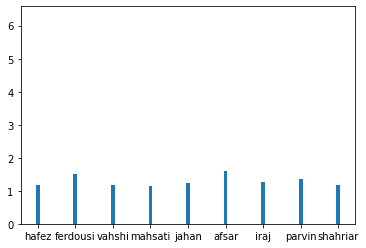

In [143]:
def draw_barchart_by_dict(darsad , num ):
    X = np.arange(len(darsad))
    pl.bar(X, darsad.values(), align='center', width=0.1)
    pl.xticks(X, darsad.keys())
    ymax = max(darsad.values()) + num
    pl.ylim(0, ymax)
    pl.show()

draw_barchart_by_dict(darsad_hamasi_bodan_dict , 5)

<h4 dir="rtl">
حال در ادامه به بررسی متون عاشقانه میپردازیم و روندی مشابه کار بالا را برای متون عاشقانه و احساسی می پیماییم. همچنین برای این کار لیستی از برخی کلمات عاشقانه را آماده کردیم.
</h4>

In [144]:
darsad_emotional_bodan_dict={}
emotional_traits_list=["یار","عشق","جان","محبوب","دلبر","جانان","افسانه"
                       ,"دلدار","لیلی","وفا","چشمان" , "لحظه","افلاک"
                       ,"علاقه","مشتاق","نشاط","الهام","امیدوار","خاص",
                       "قلب","لعل","نفس","آغوش","آفاق","عطر" ,"محمل","سحر"
                       ,"دل","هوش","رخ","چشم","چشمان","لبخند","گل","صوفی"
                       ,"زندگی","بوسه","روشن","دلبر","خیال", "عهد","آشنا"
                      "نغمه" , "آفتاب","شمع","پروانه","رقص","مستی","شهاب" 
                      "مرید","سرو","باد","نقاب","قصر","صلح","طره","مهر","آتش",
                      "نسیم","جمال","خاک","جهان","مستی","حاجت","رقیب","شراب" 
                      "هوس","اوقات","ویرانه","طلسم","بوی","خون","خدا","شیرین",
                       "موزون","دیوانه","زلف","موی","پاک","جرعه","چشمه",
                      "سلامت","معجزه","رب","خال","سخن","آشیان","قافله","چشمه","طرب"
                      "انفاس","غم","باده","رقص","ساغر","قلم","خوش","شعر","سوخت","فاتحه",
                      "بهشت","گنج","سال","لبش","شهر","وصل","گنج","رحمت","دستخوش","آینه",
                      "خرقه","نرگس","گوارا","نقاب","قطره","سرزنش","گدای","رمز","بهر", 
                      "نامه","پروانه","جهان","قدر","شرح","فراق","نگران","معرکه","مجلس", 
                      "ساقی","آشمان","مدد","عالم","جمال","کفن","لاله","بهار","برگ","شب" ]

<h4 dir="rtl">
    حال همانگونه که انتظار میرفت درصد احساسی بودن اشعار شاعران از قبیل حافط و شهریار و اغلب بانوان که عارفانه عاشقانه است، نسبت به سایز شاعران.
</h4>

In [145]:
darsad_emotional_bodan_dict["hafez"]=find_numberOf_your_words(hafez_mesrae_list , emotional_traits_list  )


number of hemasi words = 32392 
number of all words = 1531497 
percentage of hemasi words = 2.115054747087327


In [146]:
darsad_emotional_bodan_dict["ferdousi"]=find_numberOf_your_words(ferdousi_mesrae_list , emotional_traits_list  )


number of hemasi words = 1652 
number of all words = 74724 
percentage of hemasi words = 2.210802419570687


In [147]:
darsad_emotional_bodan_dict["vahshi"]=find_numberOf_your_words(vahshi_mesrae_list , emotional_traits_list  )


number of hemasi words = 23799 
number of all words = 1211139 
percentage of hemasi words = 1.9650097965634001


In [148]:
darsad_emotional_bodan_dict["mahsati"]=find_numberOf_your_words(mahsati_mesrae_list , emotional_traits_list  )


number of hemasi words = 10661 
number of all words = 571983 
percentage of hemasi words = 1.8638665834474104


In [149]:
darsad_emotional_bodan_dict["jahan"]=find_numberOf_your_words(jahan_mesrae_list , emotional_traits_list  )


number of hemasi words = 304 
number of all words = 12839 
percentage of hemasi words = 2.3677856530882466


In [150]:
darsad_emotional_bodan_dict["afsar"]=find_numberOf_your_words(afsar_mesrae_list , emotional_traits_list  )


number of hemasi words = 3750 
number of all words = 136254 
percentage of hemasi words = 2.752212779074376


In [151]:
darsad_emotional_bodan_dict["iraj"]=find_numberOf_your_words(iraj_mesrae_list , emotional_traits_list  )


number of hemasi words = 2656 
number of all words = 122842 
percentage of hemasi words = 2.1621269598345845


In [152]:
darsad_emotional_bodan_dict["parvin"]=find_numberOf_your_words(parvin_mesrae_list , emotional_traits_list  )


number of hemasi words = 3203 
number of all words = 141980 
percentage of hemasi words = 2.2559515424707706


In [153]:
darsad_emotional_bodan_dict["shahriar"]=find_numberOf_your_words(shahriar_mesrae_list , emotional_traits_list  )


number of hemasi words = 10846 
number of all words = 497912 
percentage of hemasi words = 2.1782965664615435


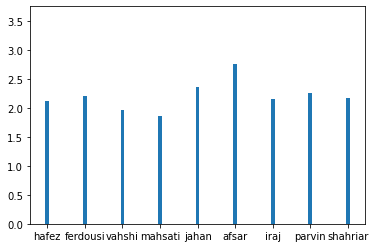

In [154]:
draw_barchart_by_dict(darsad_emotional_bodan_dict , 1 )

<h4 dir="rtl">
    حال در ادامه با توجه به دسته بندی ای که در ابتدا کرده بودین (شاعران خانم و اقا و معاصران) میخواهیم میانگین تعداد کلمات در ابیات شان را بسنجیم.
    تابع زیر را برای دو دشته از شاعران اجرا میکنیم تا اطلاعات یافت شده را ببینیم.
</h4>

In [177]:

def find_avgInfo(poet_list):
    print ('%-16s' % 'Number of sentence', '%-16s' % len(poet_list))
    print ('%-16s' % 'Number of unique sentence', '%-16s' % len(set(poet_list)))
    avg=np.sum([len(word) for word in poet_list])/len(poet_list)
    print ('%-16s' % 'Average sentence length', '%-16s' % avg)
    print ('%-16s' % 'Longest sentence', '%-16s' % poet_list[np.argmax([len(word) for word in poet_list])])
 

In [168]:
find_avgInfo(hafez_mesrae_list )

Number of sentence 356883          
Number of unique sentence 7933            
Average sentence length 7.004228276493977
Longest sentence نکته اصلی این غزل در این بیت نهفته . لوپ یعنی تکرار ؛ به این معنی که یک روح برای رسیدن به مقصد مشخصی یک حلقه را بارها و بارها طی میکند. گاه طی کردن این حلقه منجر به دیر رسیدن روح به مقصد و گاه منجر به از بین رفتن روح می شود و گاه از حلقه میتوان خارج شد.یک موش گرفتار در حلقه تکراری لوپ را بارها دیده اید.ما روح هایی آزاد بودیم و خداوند ما را در زندگی های مکرر قرار داد تا روحمان رشد کند، در دنیاهای متعدد و در جسمهای مختلف ، روح هایی توانستند از لوپ خارج شوند.



In [176]:
find_avgInfo(shahriar_mesrae_list )

Number of sentence 115699          
Number of unique sentence 2932            
Average sentence length 7.068367055895038
Longest sentence                             اگر پیش‌تر در گنجینه یا پیشخان خوانشگران گنجور نام‌نویسی کرده‌اید می‌توانید با همان اطلاعات کاربری به گنجور وارد شوید.



<h4 dir="rtl">
حالا در ادامه میخواهیم در اشعاری که داریم ببینیم که شاعر مربوطه چند بار نام خود را در شعر آورده و اصطلاحا تخلص به کار برده است.
    <br>
    همچنین این مورد میتواند بیشتر تفاوت اشعار زناان و مردان را نشان دهد زیرا شاعران مرد بیشتر نام خود را در اشعارشان بکار میبرند.
</h4>

In [179]:
repetitions_of_the_poets_name={}

def find_repetitions_of_the_poets_name(normalized_dict , name1 , name2 ):
    repetitions=0
    for i in normalized_dict:
        if i.__contains__(name1) or i.__contains__(name2) :
            repetitions+=1
    print(repetitions)
    return repetitions


In [180]:
repetitions_of_the_poets_name["hafez"] = find_repetitions_of_the_poets_name(mesra_normalized['hafez_ghazal.txt'] , "حافظا" , "حافظ")

412


In [181]:
repetitions_of_the_poets_name["ferdousi"] = find_repetitions_of_the_poets_name(mesra_normalized['ferdousi_sohrab.txt'] , "فردوسیا" , "فردوسی")

0


In [182]:
repetitions_of_the_poets_name["vahshi"] = find_repetitions_of_the_poets_name(mesra_normalized['vahshi_ghazalv.txt'] , "وحشیا" , "وحشی")

331


In [183]:
repetitions_of_the_poets_name["mahsati"] = find_repetitions_of_the_poets_name(mesra_normalized['mahsati_robmah.txt'] , "مهستیا" , "مهستی")

1


In [184]:
repetitions_of_the_poets_name["jahan"] = find_repetitions_of_the_poets_name(mesra_normalized['jahan_ghaside.txt'] , "خاتونا" , "خاتون")

0


In [185]:
repetitions_of_the_poets_name["afsar"] = find_repetitions_of_the_poets_name(mesra_normalized['afsar_kooroshname.txt'] , "افسرا" , "افسر")

17


In [186]:
repetitions_of_the_poets_name["iraj"] = find_repetitions_of_the_poets_name(mesra_normalized['iraj_ghaside.txt'] , "میرزا" , "ایرج")

3


In [187]:
repetitions_of_the_poets_name["parvin"] = find_repetitions_of_the_poets_name(mesra_normalized['parvin_ghasidep.txt'] , "پروینا" , "پروین")

23


In [188]:
repetitions_of_the_poets_name["shahriar"] = find_repetitions_of_the_poets_name(mesra_normalized['shahriar_gozidegh.txt'] , "حافظا" , "حافظ")

19


<h4 dir="rtl">
از اعداد حاصل شده میتوان دریافت که شاعران خانم خیلی کمتر نام خود را بکار میبردند و همچنین اصولا شاعران قدیمی تر آرایه ی تخلص را بکار میبردند و رفته رفته کمتر شده.
</h4>

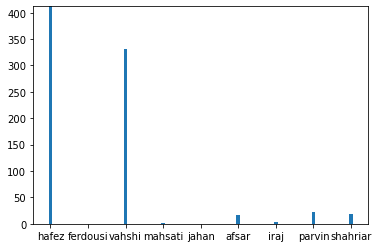

In [189]:
draw_barchart_by_dict(repetitions_of_the_poets_name , 0 )

<h4 dir="rtl">
در ادامه میخواهیم تعداد تکرر کلمه ی زن و مرد را در اشعار مشاهده کنیم و ببینیم که آیا جنسیت شاعران تاثیری در اشعارشان داشته یا خیر.
    <br>
    برای این کار هم از stemmer  استفاده میکنیم که موارد اضافه اعم از ضمایر و... را حذف نماید و بتوانیم تحلیل دقیق تری داشته باشیم
     حالا میخواهیم درون هر متن تعداد هر کلمه  را جداگانه نمایش دهیم و به صورت ریشه ای تر نگاه کنیم.
</h4>

In [190]:
from hazm import Stemmer
stemmer = Stemmer()

dict_for_my_word={}

In [191]:
def find_number_of_zan_mard(mesra_normalized , address , my_word1 , my_word2 ):
    counter1=0
    counter2=0
    for mesrae  in mesra_normalized[address]:
        for each_words in mesrae:
                if stemmer.stem(each_words)==my_word1:
                    counter1 +=1
                if stemmer.stem(each_words)== my_word2:
                    counter2 +=1
    print("number of repitation of %s  "%my_word1  ,end="" ) 
    print("is = %s" %counter1)
    print()
    print("number of repitation of %s  "%my_word2  ,end="" ) 
    print("is = %s" %counter2)
    
    return (counter1 , counter2)
        

In [192]:
dict_for_my_word["hafez"]=find_number_of_zan_mard(mesra_normalized , "hafez_ghazal.txt" , "زن", "مرد")

number of repitation of زن  is = 25

number of repitation of مرد  is = 38


In [193]:
dict_for_my_word["ferdousi"]=find_number_of_zan_mard(mesra_normalized , "ferdousi_sohrab.txt" ,"زن", "مرد")

number of repitation of زن  is = 5

number of repitation of مرد  is = 31


In [194]:
dict_for_my_word["vahshi"]=find_number_of_zan_mard(mesra_normalized , "vahshi_ghazalv.txt" , "زن", "مرد")

number of repitation of زن  is = 12

number of repitation of مرد  is = 38


In [195]:
dict_for_my_word["mahsati"]=find_number_of_zan_mard(mesra_normalized , "mahsati_robmah.txt" , "زن", "مرد")

number of repitation of زن  is = 11

number of repitation of مرد  is = 6


In [196]:
dict_for_my_word["jahan"]=find_number_of_zan_mard(mesra_normalized , "jahan_ghaside.txt" , "زن", "مرد")

number of repitation of زن  is = 0

number of repitation of مرد  is = 0


In [197]:
dict_for_my_word["afsar"]=find_number_of_zan_mard(mesra_normalized , "afsar_kooroshname.txt" , "زن", "مرد")

number of repitation of زن  is = 40

number of repitation of مرد  is = 71


In [198]:
dict_for_my_word["iraj"]=find_number_of_zan_mard(mesra_normalized , "iraj_ghaside.txt" , "زن", "مرد")

number of repitation of زن  is = 20

number of repitation of مرد  is = 32


In [199]:
dict_for_my_word["parvin"]=find_number_of_zan_mard(mesra_normalized , "parvin_ghasidep.txt" ,"زن", "مرد")

number of repitation of زن  is = 6

number of repitation of مرد  is = 23


In [200]:
dict_for_my_word["shahriar"]=find_number_of_zan_mard(mesra_normalized , "shahriar_gozidegh.txt" ,"زن", "مرد")

number of repitation of زن  is = 9

number of repitation of مرد  is = 28


In [201]:
t=(9,2)
n=np.empty(t)
print(n)

[[253.44       253.44      ]
 [ 36.         210.69087379]
 [ 36.52776699  36.        ]
 [ 44.97203883  37.58330097]
 [ 48.13864078  46.02757282]
 [253.44       253.44      ]
 [ 36.         253.44      ]
 [ 29.         251.10679612]
 [253.44       253.44      ]]


<h4 dir="rtl">حالا با توجه به نمودار رسم شده میتوان دریافت که بیشتر در مورد مرد بودن  و همچنین مردانگی صحبت شده و همچنین با توجه به عقاید قدیمی و محدودیت موجود آن کمتر در مورد زنان صحبت شده.
</h4>

['hafez', 'ferdousi', 'vahshi', 'mahsati', 'jahan', 'afsar', 'iraj', 'parvin', 'shahriar']


<AxesSubplot:>

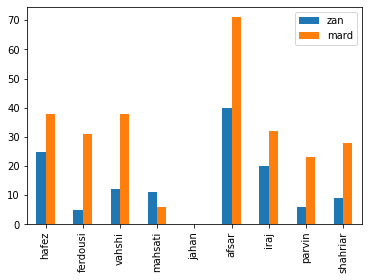

In [203]:
import pandas as pd
index_= 0
poet=[]
for key , val in  dict_for_my_word.items():
    a,b = val
    n[index_][0]=a
    n[index_][1]=b
    index_+=1
    poet.append(key)
print(poet)
data=pd.DataFrame(n, columns=["zan" , "mard"] , index=poet )
data.plot.bar()


<h4 dir="rtl">
حالا در ادامه نیز اشعاری که مذهبی هستند را و شاعران مربوطه را به دست می اوریم و حالا درون لیست مربوطه میریزیم و قابل مشاهده است.
    <br>
    در واقع برای این کار میخواهیم از سایت مربوزه که شاکل کلماتی که تم مذهبی دارند بیایم و این کلمات را کراول کنیم و در اشعار شاعرانمان سرچشان کنیم و درصد بگیریم.

</h4>

In [204]:
mazhabi_words=[]
def crawl_from_mahabi_site(mazhabi_words ):
    address_of_maddahi_site="https://fa.wikishia.net/view/%D8%B1%D9%88%D8%B6%D9%87_%D8%A7%D8%B1%D8%A8%D8%B9%DB%8C%D9%86"
    request_= requests.get(address_of_maddahi_site)
    soup_ = BeautifulSoup(request_.text, "html.parser")
    select_class = soup_.select("p")

    for i in select_class:
        links=i.select('a')
        for j in links:
            if not j.get_text().__contains__("["):
                mazhabi_words.append((j.get_text()))


crawl_from_mahabi_site(mazhabi_words)
print(mazhabi_words)



['واقعه کربلا', 'اسیران کربلا', 'روزشمار واقعه عاشورا', 'روز عاشورا', 'نامه\u200cهای کوفیان به امام حسین(ع)', 'واقعه عاشورا (از نگاه آمار)', 'امام حسین(ع)', 'شیعیان', 'اربعین', 'اسرای اهل بیت(ع)', 'کربلا', 'شهدای کربلا', 'زیارت', 'جابر بن عبدالله انصاری', 'عطیه عوفی', 'اسرای اهل بیت', 'کوفه', 'شام', 'محدث نوری', 'شیخ عباس قمی', 'سید ابن طاووس', 'لهوف', 'شام', 'عراق', 'واقعه عاشورا', 'جابر بن عبدالله انصاری', 'بنی هاشم', 'زیارت', 'امام حسین(ع)', 'مدینه', 'تحقیق درباره اول اربعین حضرت سیدالشهداء(ع)', 'سید محمد علی قاضی طباطبایی', 'جابر بن عبدالله انصاری', 'صحابه', 'رسول خدا(ص)', 'عطیه عوفی', 'کربلا', 'زیارت', 'اسرای اهل بیت', 'شام', 'روضه خوان', 'مدینه', 'بشیر بن جذلم', 'امام سجاد(ع)', 'سکینه', 'ام کلثوم', 'حضرت عباس(ع)', 'رباب', 'علی اصغر', 'نیازمند منبع', 'عروسی قاسم', 'تحریفات', 'نیازمند منبع', 'ابن زیاد', 'یزید', 'حضرت رقیه', 'جابر بن عبدالله انصاری']


<h4 dir="rtl">
حالا ما باید یک دیکشنری بسازیم و درصد مربوطه را در آن ثبت کنیم.
</h4>

In [205]:
darsad_mazhabi_bodan_dict={}

In [206]:
darsad_mazhabi_bodan_dict["hafez"]=find_numberOf_your_words(hafez_mesrae_list , mazhabi_words )

number of hemasi words = 128 
number of all words = 1531497 
percentage of hemasi words = 0.008357835503432262


In [207]:
darsad_mazhabi_bodan_dict["ferdousi"]=find_numberOf_your_words(ferdousi_mesrae_list , mazhabi_words )

number of hemasi words = 0 
number of all words = 74724 
percentage of hemasi words = 0.0


In [208]:
darsad_mazhabi_bodan_dict["vahshi"]=find_numberOf_your_words(vahshi_mesrae_list , mazhabi_words )

number of hemasi words = 17 
number of all words = 1211139 
percentage of hemasi words = 0.001403637402478163


In [209]:
darsad_mazhabi_bodan_dict["mahsati"]=find_numberOf_your_words(mahsati_mesrae_list , mazhabi_words )

number of hemasi words = 3 
number of all words = 571983 
percentage of hemasi words = 0.0005244911124980987


In [210]:
darsad_mazhabi_bodan_dict["jahan"]=find_numberOf_your_words(jahan_mesrae_list , mazhabi_words )

number of hemasi words = 5 
number of all words = 12839 
percentage of hemasi words = 0.03894384297842511


In [211]:
darsad_mazhabi_bodan_dict["afsar"]=find_numberOf_your_words(afsar_mesrae_list , mazhabi_words )

number of hemasi words = 35 
number of all words = 136254 
percentage of hemasi words = 0.025687319271360837


In [212]:
darsad_mazhabi_bodan_dict["iraj"]=find_numberOf_your_words(iraj_mesrae_list , mazhabi_words )

number of hemasi words = 13 
number of all words = 122842 
percentage of hemasi words = 0.010582699728106023


In [213]:
darsad_mazhabi_bodan_dict["parvin"]=find_numberOf_your_words(parvin_mesrae_list , mazhabi_words )

number of hemasi words = 21 
number of all words = 141980 
percentage of hemasi words = 0.01479081560783209


In [227]:
darsad_mazhabi_bodan_dict["shahriar"]=find_numberOf_your_words(shahriar_mesrae_list , mazhabi_words )

number of hemasi words = 29 
number of all words = 497912 
percentage of hemasi words = 0.0058243223702180305


<h4 dir="rtl">
 با توجه به نمودار میتوان  دریافت که بین شاعران، جهان ملک خاتون اشعار مذهبی تری دارد.
    <br>
    و نتیجه دیگری که میتوان گرفت این است که در گذشته در بین این شعرا بیشتر در مورد عشق شعر گفته میشد که از نظر معلم ادبیات منظورشون خداوند بوده است.
</h4>

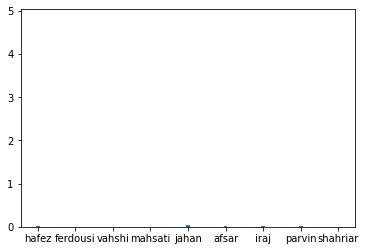

In [229]:
draw_barchart_by_dict(darsad_mazhabi_bodan_dict , 5)

<h4 dir="rtl">
همچنین گر در مورد شعر افسر الملوک اطلاعی داشته باشید میدانید که عواطف  و مهر مادری در اشعار وی نسیت به دیگر شعرای معاصر زیادتر است میخواهیم این مورد را در اشعار مشاهده کنیم و با دیگر شعرا مقایسه نماییم.
    
</h4>

<h4 dir="rtl">
در ایتدا لیستی از کلمات عاطفی تهیه میکنیم و در بین اشعار شاعران معاصر سرچ میکینم
</h4>

In [231]:
aatefi_words = [
    "آرامش","آراام","جان","خاتون","زندگی","نفس","مادر"
    ,"مدد","زندگی","روح","زنانه","عاطفی","عاطفه","مادری"
    ,"قوی","احساس","حساس","حس","صلح","زنان","یار"
    ,"بهار","مهر","مهرورزی","لطف","محبت","ثمر","شاد", 
]

In [232]:
darsad_atefi_boodan = {}

In [233]:
darsad_atefi_boodan["shahriar"]=find_numberOf_your_words(shahriar_mesrae_list , aatefi_words )

number of hemasi words = 454 
number of all words = 497912 
percentage of hemasi words = 0.09118077089927537


In [234]:
darsad_atefi_boodan["parvin"]=find_numberOf_your_words(parvin_mesrae_list , aatefi_words )

number of hemasi words = 284 
number of all words = 141980 
percentage of hemasi words = 0.20002817298211015


In [235]:
darsad_atefi_boodan["iraj"]=find_numberOf_your_words(iraj_mesrae_list , aatefi_words )

number of hemasi words = 165 
number of all words = 122842 
percentage of hemasi words = 0.1343188811644226


In [236]:
darsad_atefi_boodan["afsar"]=find_numberOf_your_words(afsar_mesrae_list , aatefi_words )

number of hemasi words = 766 
number of all words = 136254 
percentage of hemasi words = 0.5621853303389258


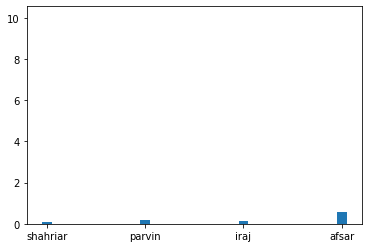

In [238]:
draw_barchart_by_dict(darsad_atefi_boodan , 10)

<h4 dir="rtl">
حال با توجه به علاقه ی شخصی خود دوست دارم که بیشتر روی اشعار حافظ و سعدی آنالیزهایی انجام دهم:
    
</h4>

In [266]:
import re

<h4 dir="rtl">
الفبای فارسی برای تحلیل وزن کلمات
</h4>

<h4 dir="rtl">
در ادامه میخواهم تابعی بنویسم که بیاید و یک ارایه ورودی بگیرد و در واقع این آرایه دو عضو دارد که عضور اول آن مصراع اول و عضو دوم آن مصراع دومش شعر است و میخواهم که از الگوی الگوریتم وزنی استفاده نمایم که طریقه ی آن را شرح میدهم.
</h4>

<h4 dir="rtl">
در الگوریتم وزنی، هر حرف در شعر فارسی یک وزن دارد که معمولاً یکی از اعداد ۱، ۲، ۳، ۴، ۵، ۶، ۷ و ۸ است. هر قافیه در شعر فارسی یکی از انواع زیر را دارد:
<br>
۱. قافیه آسایش: اگر آخرین حرف در هر مصراع، یکی از حروف "آ"، "و" یا "ی" باشد، قافیه آسایش است. وزن این قافیه برابر با ۱ است.
<br>
۲. قافیه سری: اگر آخرین حرف در هر مصراع، یکی از حروف "ا"، "د"، "ذ"، "ر"، "ز"، "ژ"، "و" یا "ی" باشد، قافیه سری است. وزن این قافیه برابر با ۲ است.
<br>
۳. قافیه فاخر: اگر آخرین حرف در هر مصراع، یکی از حروف "ب"، "پ"، "ت"، "ث"، "ج"، "چ"، "ح"، "خ"، "س"، "ش"، "ص"، "ض"، "ط"، "ظ"، "ع"، "غ"، "ف"، "ق"، "ک"، "گ" یا "ل" باشد، قافیه فاخر است. وزن این قافیه برابر با ۳ است.
</h4>

In [320]:
def calculate_meter(poems):
    meter = []
    for poem in poems:
        last_word = poem.strip().split()[-1]
        last_letter = last_word[-1]
        if last_letter in ['آ', 'و', 'ی']:
            meter.append(1)
        elif last_letter in ['ا', 'د', 'ذ', 'ر', 'ز', 'ژ', 'و', 'ی']:
            meter.append(2)
        elif last_letter in ['ب', 'پ', 'ت', 'ث', 'ج', 'چ', 'ح', 'خ', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ک', 'گ', 'ل']:
            meter.append(3)
    return meter


<h4 dir="rtl">
برای تست در ابتدا یک شعر از ابیات فردوسی و سپس یک تست دیگر برای قافیه های ابیات حافظ انجام میدهیم
</h4>

In [321]:
poems = ['ستمکاره خوانیمش ار دادگر', 'هنرمند دانیمش ار بی‌هنر']
meter = calculate_meter(poems)
print(meter)


[2, 2]


In [323]:
poems = ['اَلا یا اَیُّهَا السّاقی اَدِرْ کَأسَاً و ناوِلْها', 'که عشق آسان نمود اوّل ولی افتاد مشکل‌ها']
meter = calculate_meter(poems)
print(meter)


[2, 2]


<h4 dir="rtl">
برای تشخیص نوع شعر و قالب شعری، می‌توانید از قوانین موجود در ادبیات فارسی استفاده کنید. این قوانین شامل قوانین مصرع و رویه شعری هستند. در ادامه، کدی را برای تشخیص نوع شعر و قالب شعری با ورودی دادن آرایه‌ای از مصراع‌ها آورده‌ایم:
    <br>
    در واقع شما باید آرایه ای به تابع زیر بدهید که هر عضو از آرایه مصراع های شعر است و با توجه به قالب های ادبیاتی و قوانین مربوطه کد زیر را پیاده سازی میکنیم.
    <br>
    در مورد منطق کد اگر بخواهم بگویم:
    <br>
در ابتدا، تعداد مصراع‌ها بررسی می‌شود و اگر تعداد یک مصراع باشد، نوع شعر غزل تشخیص داده می‌شود. در صورتی که تعداد مصراع‌ها بیشتر از یک باشد، با توجه به تعداد مصراع‌ها، نوع شعر را مشخص می‌کند.
سپس، با توجه به تعداد و الگوی ریم‌ها، قالب شعری را تشخیص می‌دهد. به این منظور، ابتدا آخرین کلمه هر مصراع را جدا می‌کند و آن را در یک لیست جداگانه به نام rhyme ذخیره می‌کند. سپس با استفاده از مجموعه set، تمام ریم‌های موجود در شعر را به صورت یکتا جمع‌آوری می‌کند. در صورتی که تنها یک ریم وجود داشته باشد، قالب شعری مثنوی تشخیص داده می‌شود.
سپس، با استفاده از تعداد مصراع‌ها و ریم‌ها، قالب شعری را به صورت دقیق‌تر مشخص می‌کند. به این منظور، با استفاده از شرط‌های if و else، چندین الگوی مختلف را برای قالب شعری بررسی می‌کند و در صورتی که هیچ یک از الگوها درست نباشد، قالب شعری را "شعر نو" تشخیص می‌دهد.
</h4>

In [363]:
def detect_poem_type(poem_lines):

    num_lines = len(poem_lines)

    # بررسی تعداد مصراع‌ها برای تشخیص نوع شعر
    if num_lines == 1:
        return 'غزل'
    elif num_lines >= 2 and num_lines <= 4:
        return 'رباعی'
    elif num_lines >= 5 and num_lines <= 12:
        return 'قصیده'
    elif num_lines >= 13:
        return 'مثنوی'

    # بررسی قوانین مصرع برای تشخیص قالب شعری
    rhyme = []
    for line in poem_lines:
        last_word = line.split()[-1]
        rhyme.append(last_word)

    rhyme_set = set(rhyme)

    if len(rhyme_set) == 1:
        return 'مثنوی'

    if num_lines == 2:
        if rhyme[0] == rhyme[1]:
            return 'غزل'
        else:
            return 'شعر نو'
    elif num_lines == 4:
        if rhyme[0] == rhyme[2] and rhyme[1] == rhyme[3]:
            return 'مختومقصیده'
        elif rhyme[0] == rhyme[1] and rhyme[2] == rhyme[3]:
            return 'شطرنج'
        elif rhyme[0] == rhyme[2] and rhyme[1] == rhyme[3]:
            return 'موزون قطعه'
        else:
            return 'شعر نو'
    elif num_lines > 4:
        if len(rhyme_set) == 2:
            return 'ترتیب غزلیات'
        elif len(rhyme_set) == 3:
            return 'ترتیب مختلط'
        else:
            return 'شعر نو'


In [375]:
a = [ "کجا رویم؟، بفرما، ازین جناب کجا" 
     , "مبین به سیبِ زَنَخدان که چاه در راه است" ,
     "کجا همی‌ روی ای دل بدین شتاب کجا" , 
     "بشد، که یاد خوشش باد، روزگارِ وصال"  ]
detect_poem_type(a)

'رباعی'

<h4 dir="rtl">
  کد زیر یک بیت شعر فارسی را به عنوان ورودی دریافت می‌کند و سپس با استفاده از کتابخانه‌ی persiannlp، موضوع آن بیت شعر را تشخیص می‌دهد. برای این کار ابتدا بیت شعر به شیوه‌ی preprocess_text از این کتابخانه پیش‌پردازش می‌شود تا از کلمات غیرضروری (مثل حروف ربط) و علائم نگارشی (مثل نقطه و ویرگول) جدا شوند. سپس با استفاده از مدل PersianSentiPers موجود در این کتابخانه، احتمال مثبت بودن و احتمال منفی بودن موضوع بیت شعر محاسبه می‌شود. اگر احتمال مثبت بودن موضوع بیت بیشتر باشد، خروجی به صورت positive و در غیر این صورت به صورت negative تعیین می‌شود.
</h4>

In [374]:
import hazm
from nltk.sentiment import SentimentIntensityAnalyzer

def get_sentiment(text):
    """
    تحلیل احساسات متن و بازگرداندن مقدار مثبت یا منفی آن
    """
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] >= 0:
        return 'مثبت'
    else:
        return 'منفی'
        
def get_poem_sentiment(poem):
    """
    تحلیل محتوای شعر و بازگرداندن مقدار مثبت یا منفی آن
    """
    normalizer = hazm.Normalizer()
    poem = normalizer.normalize(poem)
    tokenizer = hazm.word_tokenize(poem)
    sentiment = ''
    for token in tokenizer:
        if token in positive_words:
            sentiment = 'مثبت'
        elif token in negative_words:
            sentiment = 'منفی'
    if not sentiment:
        sentiment = get_sentiment(poem)
    return sentiment

# لغت‌نامه کلمات مثبت و منفی
positive_words = ['عشق', 'دوست', 'یار', 'بهار', 'آرامش', 'خوشبختی', 'شادی']
negative_words = ['غم', 'تنهایی', 'افسردگی', 'ناراحتی', 'درد', 'شکست']

# مثال:
poem = "اَلا یا اَیُّهَا السّاقی اَدِرْ کَأسَاً و ناوِلْها   که عشق آسان نمود اوّل ولی افتاد مشکل‌ها"
print(get_poem_sentiment(poem))


مثبت


<h3 dir="rtl">
در پایان تمرینم از اینکه وقت گذاشتید و مظالعه کردید نهایت تشکر را دارم
</h3>